# Learning to do Model Selection
In this lab, you will learn how to do model selection while strenghtening your knowledge about regularization. For this purpose, we will be using the [Digits Dataset](https://scikit-learn.org/1.5/auto_examples/datasets/plot_digits_last_image.html) embedded within scikit-learn.

The goal is to train a classifier to discriminate between small digits (0 -4) and large digits (5-9).

In [21]:
# Loading the necessary libraries
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score

## Loading the digits dataset and preparation

In [2]:
X, y = datasets.load_digits(return_X_y=True)
X = StandardScaler().fit_transform(X)

In the previous cell, we have loaded the digits dataset, followed by scaling the features of the input samples. Answer the following questions:

1. How many samples does the dataset have?
2. How many different values in y are there?
3. Investigate why we scale the features and what type of scaling does StandardScaler performs.

Use the cell below to implement the code to answer questions 1 and 2.

In [7]:
## YOUR CODE HERE
print("Number of sapmles:",X.shape[0])
print("Number of different values:",len(set(y)))

Number of sapmles: 1797
Number of different values: 10


3. We scale features to insure that the all features contribute equally to the model training. Without scaling, features with larger values can dominate those with smaller values.
StandardScaler performs Z-score normalization: It transforms the data so that each feature has a mean of 0 and a standard deviation of 1.
Formula for scaling:
z= (𝑥−𝜇)/sigma
where μ is the mean of the feature, and sigma is its standard deviation.

Using the original labels, create new labels (y_new) that reflects the classification problem we want to solve: discriminate between small and large digits:

In [9]:
# classify small against large digits
#YOUR CODE HERE
# Label small digits (0-4) as 0, large digits (5-9) as 1
y_new = np.where(y <= 4, 0, 1)

We now split the data into training and testing. We will leave 20% of the data for testing.

**Question:** What property of a model is measure with the testing set?



Your answer: The testing set allows us to have an estimation of the generalized error of a model, and by comparing training error with testing error we can have a sense of the biaseness of the model. So it measures how much the model can be generalized.

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.2, random_state=42)

We will use logistic regression with regularization to solve our classification problem. In a first experiment, we will use 'L2' regularization.

In [13]:
model_l2 = LogisticRegression(penalty="l2", tol=0.01, solver="saga")

Use the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to understand the role of each parameter. Provide your answer below.

Your answer:
    - penalty: specifies the type of regularization to be applied to the model.
    - tol: defines the tolerance for stopping criteria in the optimization algorithm. It specifies the minimum change in the cost function between iterations.
    - solver: determines the algorithm used to optimize the logistic regression objective.

Your task will be to choose the best regularization hyperparameter ($\lambda$ in the course), i.e. do model selection.

Define a vector lambda_values with a range of hyper-parameters to evaluate. Consider, at the least, the following values: 0.001, 0.01, 0.1, 1, 10, 100.

In [11]:
# Define the parameter grid for lambda

lambda_values = np.array([0.001, 0.01, 0.1, 1, 10, 100])
param_grid = {'C': lambda_values}

**Important:** Scikit-learn uses the hyper-parameter C for the regularization. This is equivalent to C=1/lambda, where lambda is the expression seen in the course.

To choose the right value, you will do cross-validation with the available training dataset.

**Question:** According to the slides you reviewed, what is a typical value for K in K-fold cross-validation?

Your answer: the typical value for K in fold cross-validation is 5

Use that value to initialize the KFold class below:

In [14]:
# Define the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds)

You will evaluate over K folds each of the models corresponding to the hyperparameters defined in lambda_grid.

**Your task:** Comment every line of code that has not been commented in the code snippet below:

In [16]:
accuracy_scores = [] # Initialize a list to store accuracy scores for each C value

for a_lambda in param_grid['C']: # Perform cross-validation for each value
    print('Now testing for lambda: ', a_lambda)
    C = a_lambda #Scikit-learns regularization hyperparameter is equivalent to 1/lambda from the course.
    model_l2.set_params(C=C) #Scikit-learns regularization hyperparameter is denoted C
    fold_accuracies = [] #Stores the accuracy of the trained model for each fold

    for train_index, val_index in kf.split(X_train): # Perform K-fold splitting on the training data
        X_ttrain, X_val = X_train[train_index], X_train[val_index] # Create training and validation sets
        y_ttrain, y_val = y_train[train_index], y_train[val_index]  # Create target values for train and validation


        model_l2.fit(X_ttrain, y_ttrain)  # Train the model on the current training fold
        y_pred = model_l2.predict(X_val)  # Predict labels for the validation fold
        accuracy = accuracy_score(y_val, y_pred)  # Calculate accuracy of predictions for the validation fold
        print('accuracy:', accuracy)  # Print the accuracy for the current fold
        fold_accuracies.append(accuracy)  # Append the accuracy to the list of fold accuracies

    average_accuracy = sum(fold_accuracies) / num_folds  # Calculate the average accuracy across folds
    print('average of fold', average_accuracy)  # Print the average accuracy for the current value of C
    accuracy_scores.append(average_accuracy)  # Append the average accuracy to the overall scores list

Now testing for lambda:  0.001
accuracy: 0.8923611111111112
accuracy: 0.84375
accuracy: 0.818815331010453
accuracy: 0.8780487804878049
accuracy: 0.8327526132404182
average of fold 0.8531455671699575
Now testing for lambda:  0.01
accuracy: 0.9027777777777778
accuracy: 0.8784722222222222
accuracy: 0.8362369337979094
accuracy: 0.9059233449477352
accuracy: 0.8466898954703833
average of fold 0.8740200348432057
Now testing for lambda:  0.1
accuracy: 0.9097222222222222
accuracy: 0.8888888888888888
accuracy: 0.8501742160278746
accuracy: 0.9233449477351916
accuracy: 0.8571428571428571
average of fold 0.8858546264034068
Now testing for lambda:  1.0
accuracy: 0.9131944444444444
accuracy: 0.8854166666666666
accuracy: 0.8571428571428571
accuracy: 0.9198606271777003
accuracy: 0.8571428571428571
average of fold 0.8865514905149052
Now testing for lambda:  10.0
accuracy: 0.9131944444444444
accuracy: 0.8854166666666666
accuracy: 0.8571428571428571
accuracy: 0.9198606271777003
accuracy: 0.857142857142857

Using the vector accuracy_scores, determine which value of lambda leads to the best model:

In [17]:
# Find the best lambda value
best_lambda_l2 = param_grid['C'][np.argmax(accuracy_scores)]
best_accuracy_l2 = max(accuracy_scores)

print("Best lambda:", best_lambda_l2)
print("Best accuracy:", best_accuracy_l2)

# Train the final model with the best lambda parameter
best_model_l2 = LogisticRegression(C=best_lambda_l2, penalty="l2", tol=0.01, solver="saga")
best_model_l2.fit(X_train, y_train)

Best lambda: 1.0
Best accuracy: 0.8865514905149052


LogisticRegression(solver='saga', tol=0.01)

Using the chosen model, check its generalization error using the test set. Print the accuracy:

In [18]:
y_pred = best_model_l2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9166666666666666


### L1 regularization
Now, we will do a similar exercise using Logistic Regression with L1 regularization:

In [19]:
model_l1 = LogisticRegression(penalty="l1", tol=0.01, solver="saga")

Use the code used to cross-validate Logistic regression with L2 regularization and choose the best model, do the same to choose the best model when using the L1 regularization.

In [22]:
accuracy_scores = [] # Initialize a list to store accuracy scores for each C value

for a_lambda in param_grid['C']: # Perform cross-validation for each value
    C = a_lambda #Scikit-learns regularization hyperparameter is equivalent to 1/lambda from the course.
    print('Now testing for lambda: ', a_lambda)
    model_l1.set_params(C=C) #Scikit-learns regularization hyperparameter is denoted C
    fold_accuracies = [] #Stores the accuracy of the trained model for each fold

    ##YOUR CODE HERE
    for train_index, val_index in kf.split(X_train):
        X_ttrain, X_val = X_train[train_index], X_train[val_index]
        y_ttrain, y_val = y_train[train_index], y_train[val_index]

        model_l1.fit(X_train, y_train)
        y_pred = model_l1.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print('accuracy:', accuracy)
        fold_accuracies.append(accuracy)

    average_accuracy = sum(fold_accuracies) / num_folds
    accuracy_scores.append(average_accuracy)
    print('average of fold',average_accuracy)

# Find the best lambda value
best_lambda_l1 = param_grid['C'][np.argmax(accuracy_scores)]
best_accuracy_l1 = max(accuracy_scores)

print("Best lambda:", best_lambda_l1)
print("Best accuracy:", best_accuracy_l1)

# Train the final model with the best lambda parameter
best_model_l1 = LogisticRegression(C=best_lambda_l1, penalty="l1", tol=0.01, solver="saga")
best_model_l1.fit(X_ttrain, y_ttrain)

y_pred = best_model_l1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Final Accuracy: ", accuracy)

Now testing for lambda:  0.001
accuracy: 0.9166666666666666
accuracy: 0.9194444444444444
accuracy: 0.9166666666666666
accuracy: 0.9166666666666666
accuracy: 0.9166666666666666
average of fold 0.9172222222222223
Now testing for lambda:  0.01
accuracy: 0.9194444444444444
accuracy: 0.9166666666666666
accuracy: 0.9166666666666666
accuracy: 0.9166666666666666
accuracy: 0.9166666666666666
average of fold 0.9172222222222223
Now testing for lambda:  0.1
accuracy: 0.9166666666666666
accuracy: 0.9166666666666666
accuracy: 0.9166666666666666
accuracy: 0.9166666666666666
accuracy: 0.9166666666666666
average of fold 0.9166666666666666
Now testing for lambda:  1.0
accuracy: 0.9194444444444444
accuracy: 0.9166666666666666
accuracy: 0.9138888888888889
accuracy: 0.9166666666666666
accuracy: 0.9166666666666666
average of fold 0.9166666666666666
Now testing for lambda:  10.0
accuracy: 0.9166666666666666
accuracy: 0.9138888888888889
accuracy: 0.9166666666666666
accuracy: 0.9166666666666666
accuracy: 0.916

**Important:** You should not use the generalization performance of each of the models (L1 vs L2) to do a choice among them. You would need a cross-validation procedure for that matter.

## Comparing the properties of each regularization strategy
We will now use the full training set to study some of the properties of each regularization strategy.

In the code snippet below, you will be training 3 different models per regularization strategy and observing how these affect the weights of the model.

**Your task:** Comment the lines of code that do not have any comments.

As a reminder, the parameter C in scikit-learn is equivalent to C=1/lambda, where lambda is the regularization hyperparameter as seen in the course.

C=1.00
Sparsity with L1 penalty:                4.69%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.10
Score with L2 penalty:                   0.10
C=0.10
Sparsity with L1 penalty:                32.81%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.10
Score with L2 penalty:                   0.10
C=0.01
Sparsity with L1 penalty:                85.94%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.10
Score with L2 penalty:                   0.10


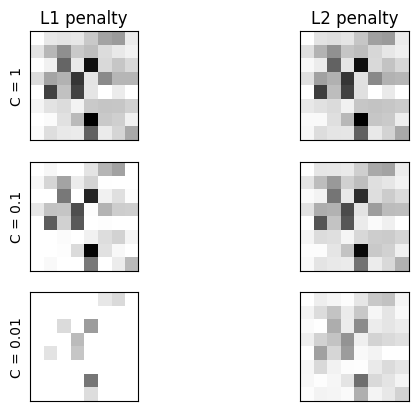

In [23]:
fig, axes = plt.subplots(3, 2)  # Create a 3x2 grid of subplots for visualizing coefficients

# Set regularization parameter
for i, (C, axes_row) in enumerate(zip((1, 0.1, 0.01), axes)):  # Iterate over C values and corresponding subplot rows
    # Increase tolerance for short training time
    model_l1 = LogisticRegression(C=C, penalty="l1", tol=0.01, solver="saga")  # Define model with L1 penalty
    model_l2 = LogisticRegression(C=C, penalty="l2", tol=0.01, solver="saga")  # Define model with L2 penalty

    model_l1.fit(X_train, y_train)  # Train the model with L1 penalty
    model_l2.fit(X_train, y_train)  # Train the model with L2 penalty

    coef_l1_LR = model_l1.coef_.ravel()  # Flatten the coefficients of the L1 model into a single array
    coef_l2_LR = model_l2.coef_.ravel()  # Flatten the coefficients of the L2 model into a single array

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100  # Calculate sparsity percentage for L1 penalty
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100  # Calculate sparsity percentage for L2 penalty

    # DO NOT COMMENT THE LINES BELOW
    print(f"C={C:.2f}")
    print(f"{'Sparsity with L1 penalty:':<40} {sparsity_l1_LR:.2f}%")
    print(f"{'Sparsity with L2 penalty:':<40} {sparsity_l2_LR:.2f}%")
    print(f"{'Score with L1 penalty:':<40} {model_l1.score(X_train, y_train):.2f}")
    print(f"{'Score with L2 penalty:':<40} {model_l2.score(X_train, y_train):.2f}")

    if i == 0:
        axes_row[0].set_title("L1 penalty")
        axes_row[1].set_title("L2 penalty")

    for ax, coefs in zip(axes_row, [coef_l1_LR, coef_l2_LR]):
        ax.imshow(
            np.abs(coefs.reshape(8, 8)),
            interpolation="nearest",
            cmap="binary",
            vmax=1,
            vmin=0,
        )
        ax.set_xticks(())
        ax.set_yticks(())

    axes_row[0].set_ylabel(f"C = {C}")

plt.show()

# Note: This code example has been adapted from scikit-learn


**Question:** Explain the differences between L1 and L2 regularization at the light of the observed plots. What are the obtained results saying?

Your answer:  
*   L1 Regularization encourages sparsity by setting many coefficients to zero(white cells in the map). This results in simpler models that focus on a subset of important features which is useful when feature selection is desired.
*   L2 Regularization does not set coefficients to zero but instead penalizes large values, resulting in smoother coefficient distributions(gray cells, uniform map). The sparsity remains constant (4.69%) regardless of C. This behavior tends to keep all features but reduces their influence, which can help avoid overfitting while retaining more information from the data.
